<a href="https://colab.research.google.com/github/govardhan-06/ML-models/blob/main/Mobile_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv("mobile phone price prediction.csv")

In [3]:
dataset.head()

,Unnamed: 0,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
0,0,Samsung Galaxy F14 5G,4.65,68,"Dual Sim, 3G, 4G, 5G, VoLTE,",4 GB RAM,6000 mAh Battery,6.6 inches,50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",13,"9,999",Samsung,128 GB inbuilt,25W Fast Charging,2408 x 1080 px Display with Water Drop Notch,Octa Core Processor,Exynos 1330
1,1,Samsung Galaxy A11,4.20,63,"Dual Sim, 3G, 4G, VoLTE,",2 GB RAM,4000 mAh Battery,6.4 inches,13 MP + 5 MP + 2 MP Triple Rear &amp; 8 MP Fro...,"Memory Card Supported, upto 512 GB",10,"9,990",Samsung,32 GB inbuilt,15W Fast Charging,720 x 1560 px Display with Punch Hole,1.8 GHz Processor,Octa Core
2,2,Samsung Galaxy A13,4.30,75,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.6 inches,50 MP Quad Rear &amp; 8 MP Front Camera,"Memory Card Supported, upto 1 TB",12,"11,999",Samsung,64 GB inbuilt,25W Fast Charging,1080 x 2408 px Display with Water Drop Notch,2 GHz Processor,Octa Core
3,3,Samsung Galaxy F23,4.10,73,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,6000 mAh Battery,6.4 inches,48 MP Quad Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",12,"11,999",Samsung,64 GB inbuilt,NaN,720 x 1600 px,Octa Core,Helio G88
4,4,Samsung Galaxy A03s (4GB RAM + 64GB),4.10,69,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.5 inches,13 MP + 2 MP + 2 MP Triple Rear &amp; 5 MP Fro...,"Memory Card Supported, upto 1 TB",11,"11,999",Samsung,64 GB inbuilt,15W Fast Charging,720 x 1600 px Display with Water Drop Notch,Octa Core,Helio P35


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1370 non-null   int64  
 1   Name               1370 non-null   object 
 2   Rating             1370 non-null   float64
 3   Spec_score         1370 non-null   int64  
 4   No_of_sim          1370 non-null   object 
 5   Ram                1370 non-null   object 
 6   Battery            1370 non-null   object 
 7   Display            1370 non-null   object 
 8   Camera             1370 non-null   object 
 9   External_Memory    1370 non-null   object 
 10  Android_version    927 non-null    object 
 11  Price              1370 non-null   object 
 12  company            1370 non-null   object 
 13  Inbuilt_memory     1351 non-null   object 
 14  fast_charging      1281 non-null   object 
 15  Screen_resolution  1368 non-null   object 
 16  Processor          1342 

In [5]:
dataset=dataset.drop(['Unnamed: 0','Name'],axis=1)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             1370 non-null   float64
 1   Spec_score         1370 non-null   int64  
 2   No_of_sim          1370 non-null   object 
 3   Ram                1370 non-null   object 
 4   Battery            1370 non-null   object 
 5   Display            1370 non-null   object 
 6   Camera             1370 non-null   object 
 7   External_Memory    1370 non-null   object 
 8   Android_version    927 non-null    object 
 9   Price              1370 non-null   object 
 10  company            1370 non-null   object 
 11  Inbuilt_memory     1351 non-null   object 
 12  fast_charging      1281 non-null   object 
 13  Screen_resolution  1368 non-null   object 
 14  Processor          1342 non-null   object 
 15  Processor_name     1370 non-null   object 
dtypes: float64(1), int64(1),

In [7]:
dataset.isnull().sum()

Rating                 0
Spec_score             0
No_of_sim              0
Ram                    0
Battery                0
Display                0
Camera                 0
External_Memory        0
Android_version      443
Price                  0
company                0
Inbuilt_memory        19
fast_charging         89
Screen_resolution      2
Processor             28
Processor_name         0
dtype: int64

In [8]:
len(dataset)

1370

In [9]:
#find out the percent of null values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

Android_version 0.3234  % missing values
Inbuilt_memory 0.0139  % missing values
fast_charging 0.065  % missing values
Screen_resolution 0.0015  % missing values
Processor 0.0204  % missing values


In [10]:
dataset['Price']=dataset['Price'].str.replace(',', '').astype(float)

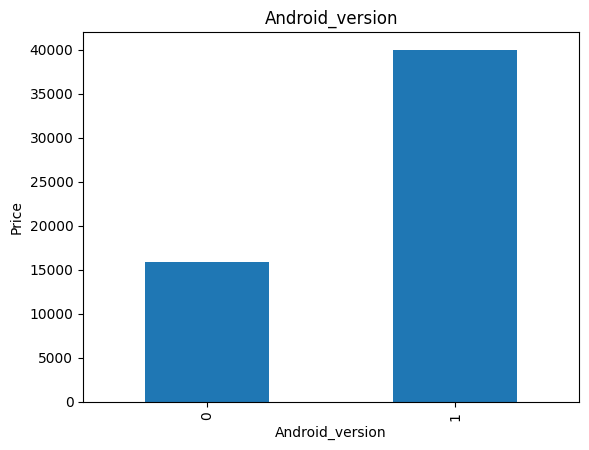

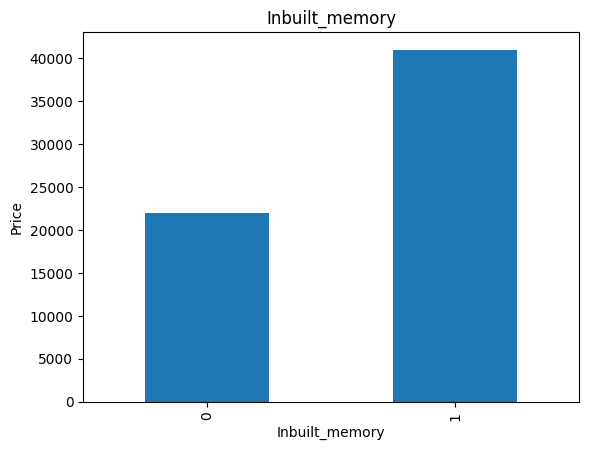

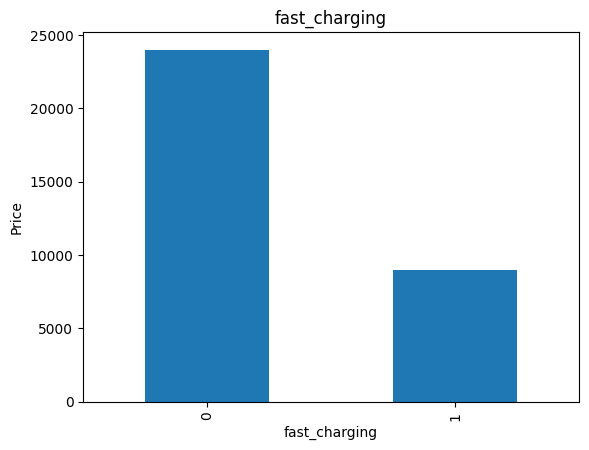

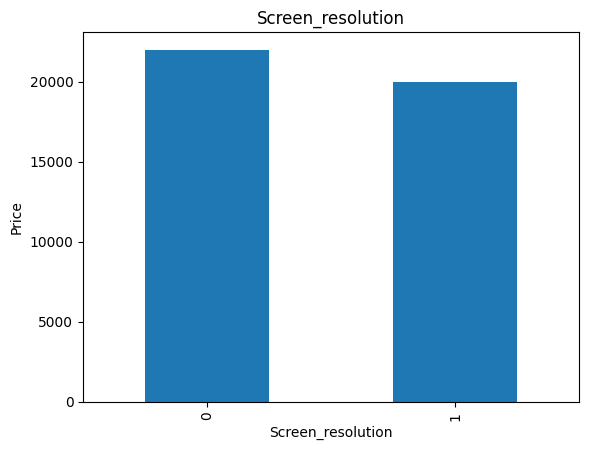

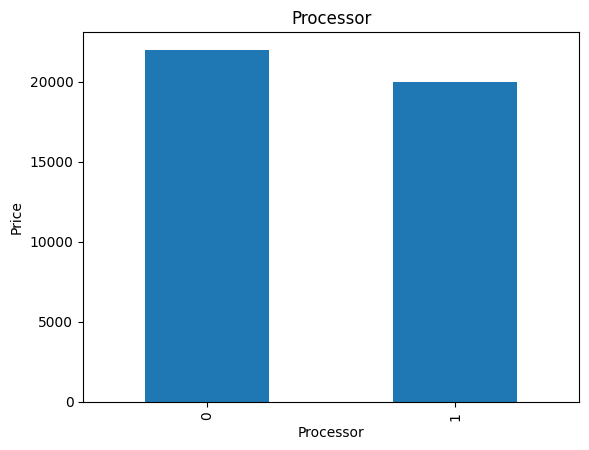

In [11]:
#checking whether the null values are affecting the price
for feature in features_with_na:
    data = dataset.copy()

    #make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)

    #calculate the mean Price where the information is missing or present
    data.groupby(feature)['Price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(feature)
    plt.show()

In [12]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  3


,Rating,Spec_score,Price
0,4.65,68,9999.0
1,4.20,63,9990.0
2,4.30,75,11999.0
3,4.10,73,11999.0
4,4.10,69,11999.0


In [13]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 1


In [14]:
discrete_feature

['Rating']

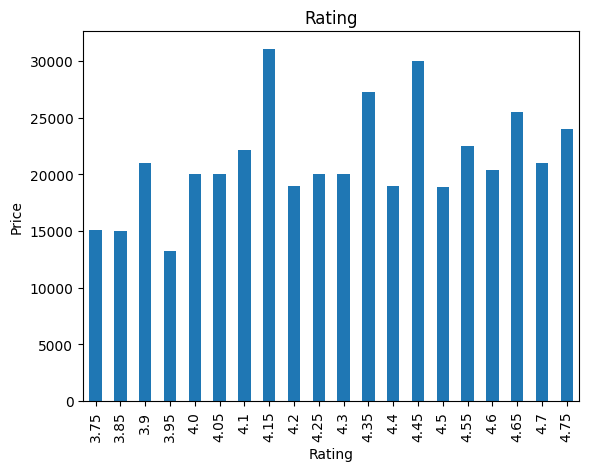

In [15]:
## Lets Find the realtionship between them and Price

for feature in discrete_feature:
    data=dataset.copy()
    data.groupby(feature)['Price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(feature)
    plt.show()

In [16]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 2


In [17]:
continuous_feature

['Spec_score', 'Price']

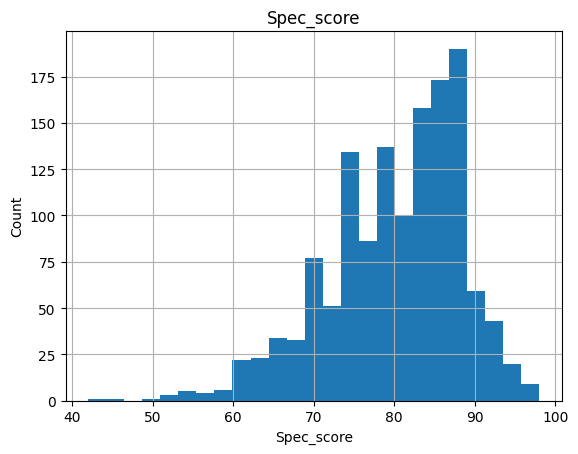

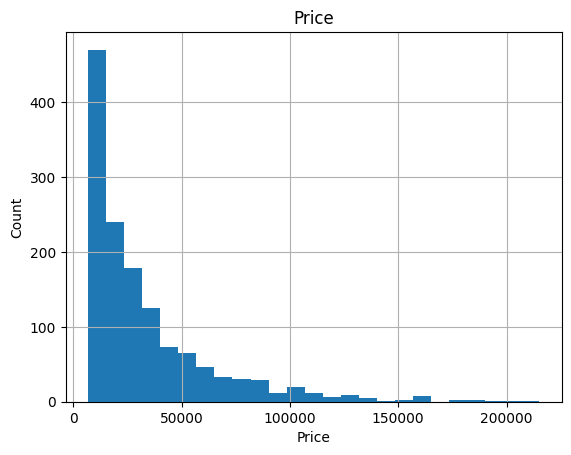

In [18]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [19]:
dataset["Price"]

0         9999.0
1         9990.0
2        11999.0
3        11999.0
4        11999.0
          ...   
1365     18999.0
1366     24990.0
1367     23990.0
1368     22499.0
1369    119990.0
Name: Price, Length: 1370, dtype: float64

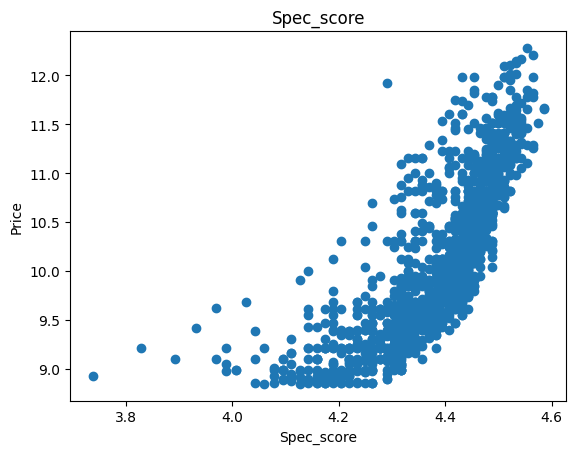

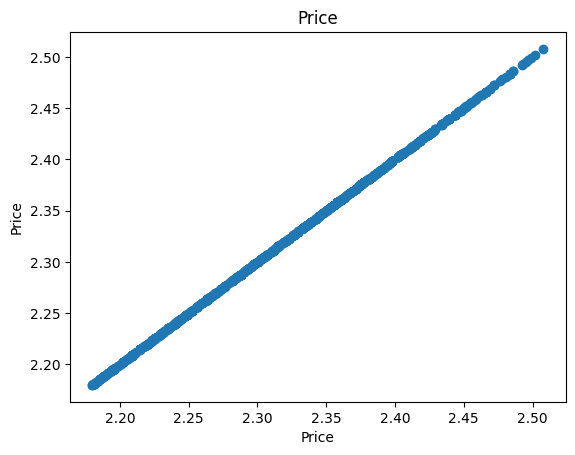

In [20]:
## We will be using logarithmic transformation
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['Price']=np.log(data['Price'])
        plt.scatter(data[feature],data['Price'])
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.title(feature)
        plt.show()

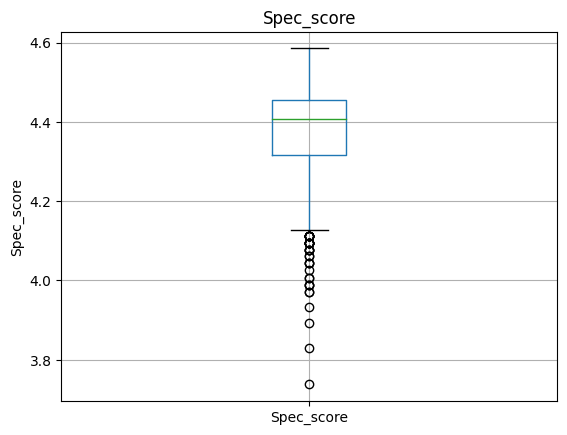

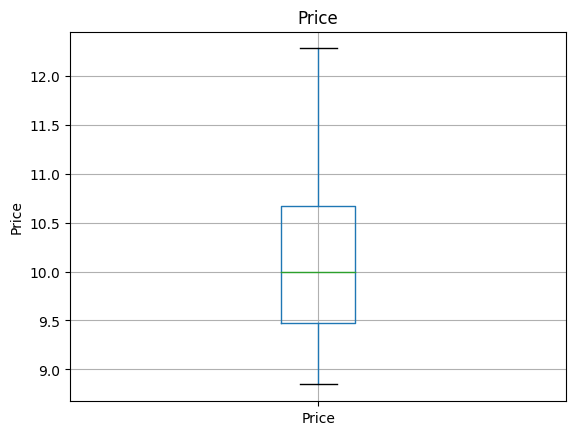

In [21]:
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()


In [22]:
categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O']
categorical_features

['No_of_sim',
 'Ram',
 'Battery',
 'Display',
 'Camera',
 'External_Memory',
 'Android_version',
 'company',
 'Inbuilt_memory',
 'fast_charging',
 'Screen_resolution',
 'Processor',
 'Processor_name']

In [23]:
dataset[categorical_features].head()

,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
0,"Dual Sim, 3G, 4G, 5G, VoLTE,",4 GB RAM,6000 mAh Battery,6.6 inches,50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",13,Samsung,128 GB inbuilt,25W Fast Charging,2408 x 1080 px Display with Water Drop Notch,Octa Core Processor,Exynos 1330
1,"Dual Sim, 3G, 4G, VoLTE,",2 GB RAM,4000 mAh Battery,6.4 inches,13 MP + 5 MP + 2 MP Triple Rear &amp; 8 MP Fro...,"Memory Card Supported, upto 512 GB",10,Samsung,32 GB inbuilt,15W Fast Charging,720 x 1560 px Display with Punch Hole,1.8 GHz Processor,Octa Core
2,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.6 inches,50 MP Quad Rear &amp; 8 MP Front Camera,"Memory Card Supported, upto 1 TB",12,Samsung,64 GB inbuilt,25W Fast Charging,1080 x 2408 px Display with Water Drop Notch,2 GHz Processor,Octa Core
3,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,6000 mAh Battery,6.4 inches,48 MP Quad Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",12,Samsung,64 GB inbuilt,NaN,720 x 1600 px,Octa Core,Helio G88
4,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.5 inches,13 MP + 2 MP + 2 MP Triple Rear &amp; 5 MP Fro...,"Memory Card Supported, upto 1 TB",11,Samsung,64 GB inbuilt,15W Fast Charging,720 x 1600 px Display with Water Drop Notch,Octa Core,Helio P35


In [24]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is No_of_sim and number of categories are 9
The feature is Ram and number of categories are 16
The feature is Battery and number of categories are 89
The feature is Display and number of categories are 89
The feature is Camera and number of categories are 347
The feature is External_Memory and number of categories are 85
The feature is Android_version and number of categories are 24
The feature is company and number of categories are 26
The feature is Inbuilt_memory and number of categories are 11
The feature is fast_charging and number of categories are 39
The feature is Screen_resolution and number of categories are 142
The feature is Processor and number of categories are 15
The feature is Processor_name and number of categories are 276


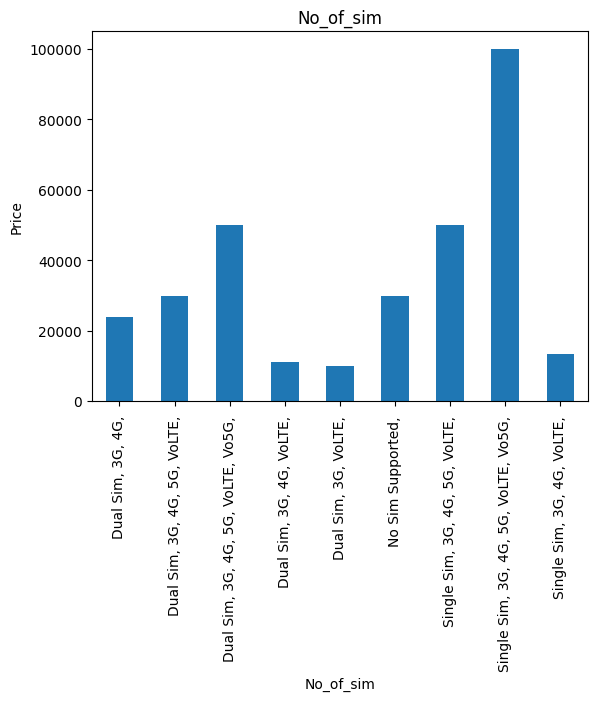

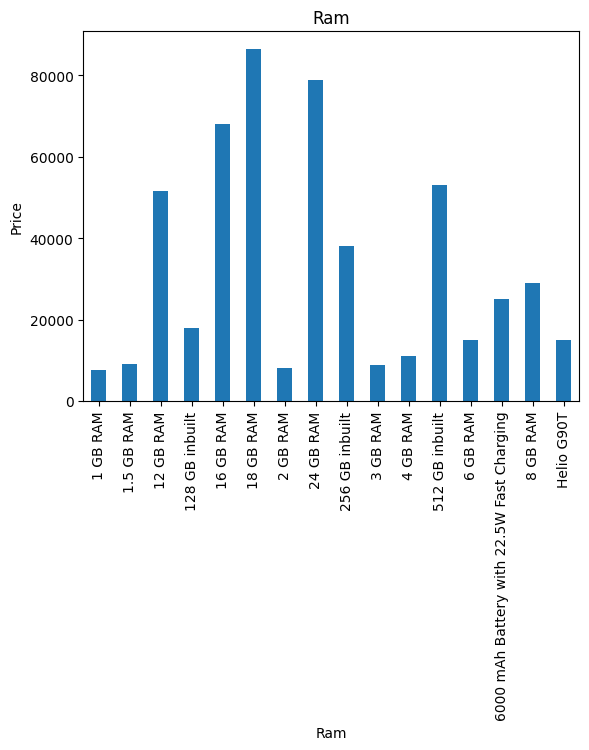

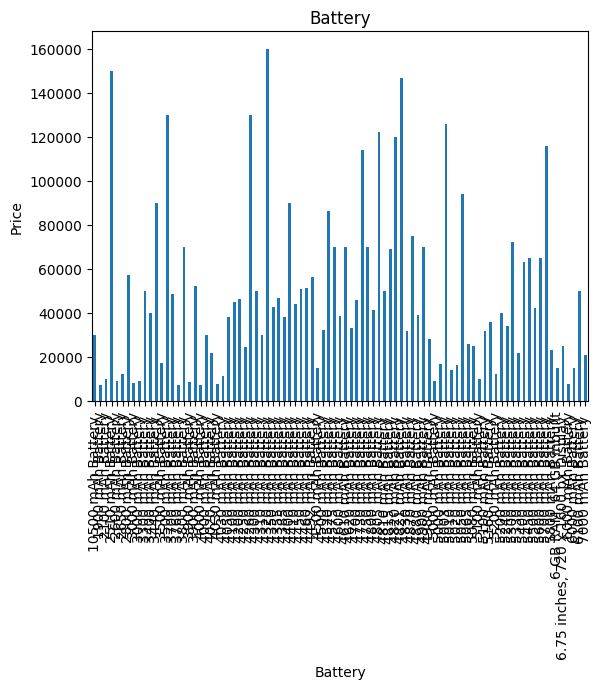

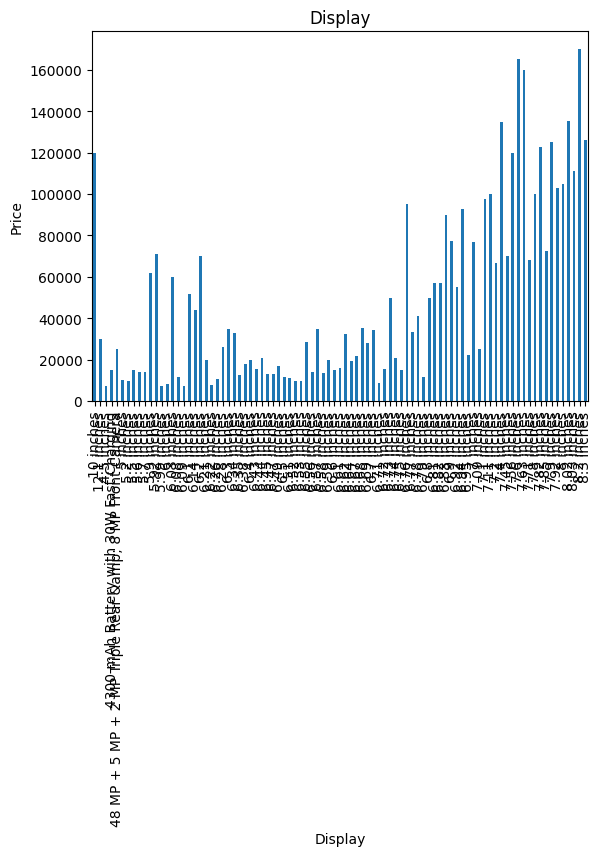

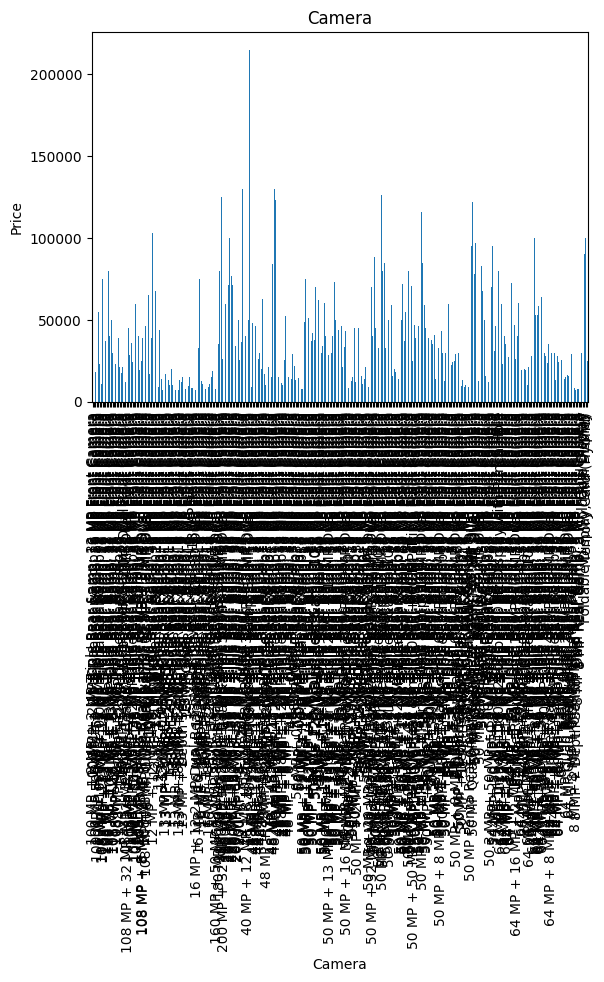

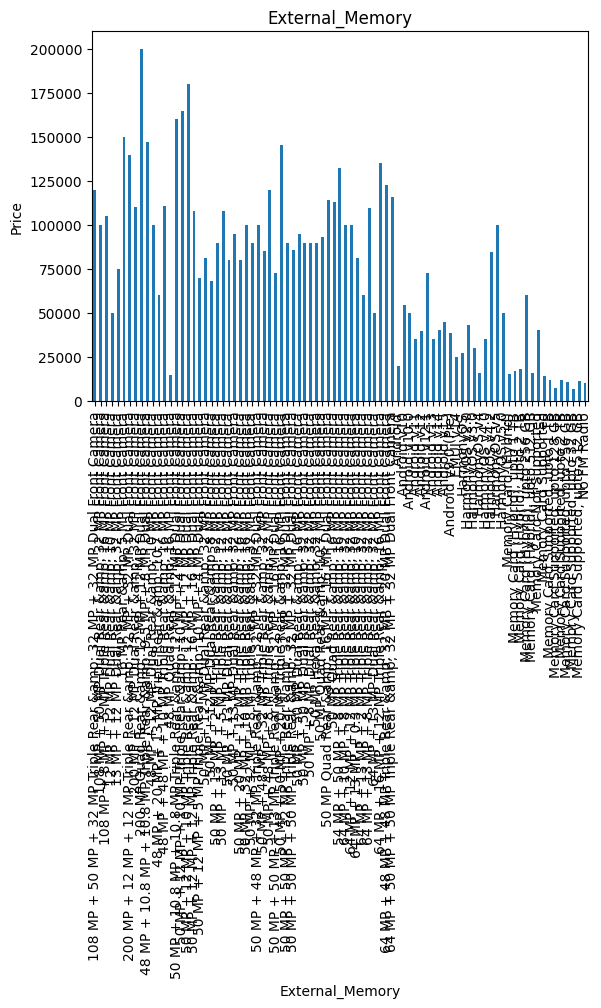

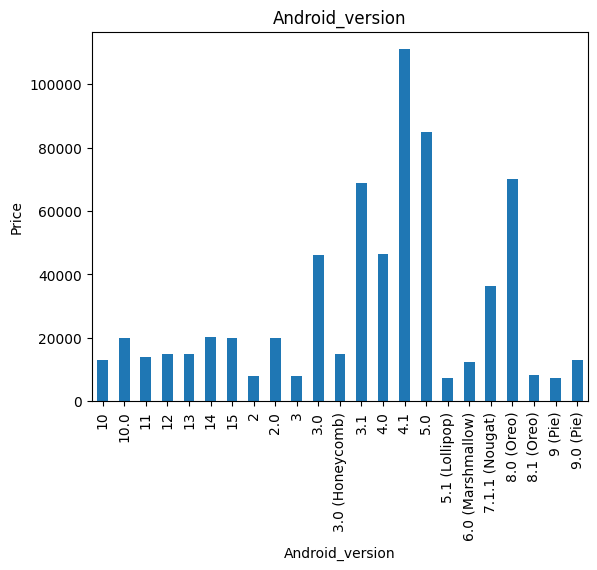

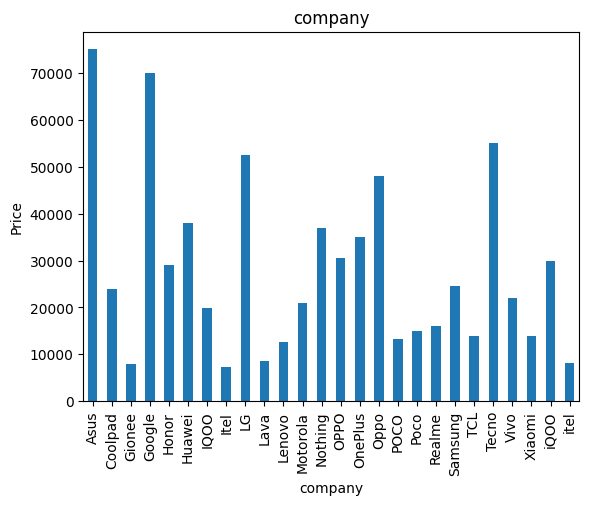

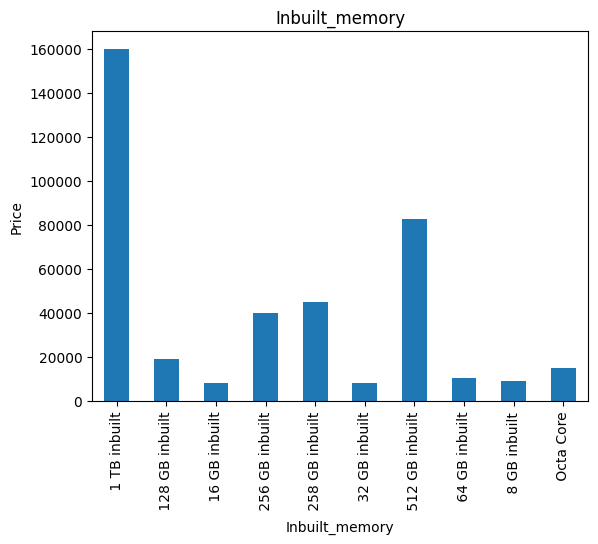

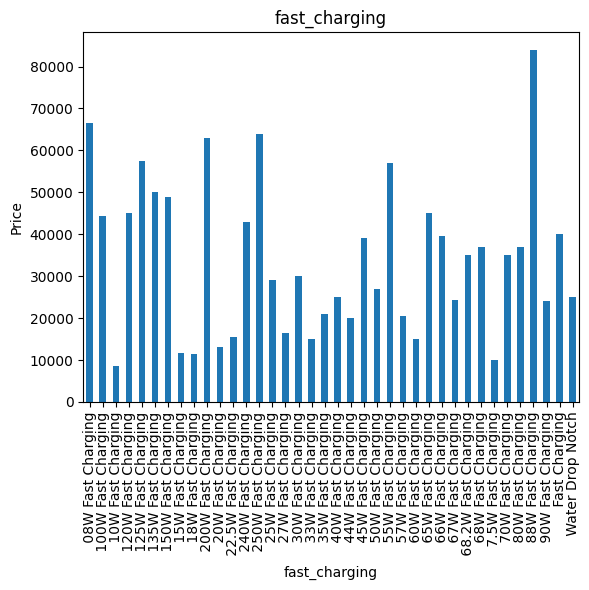

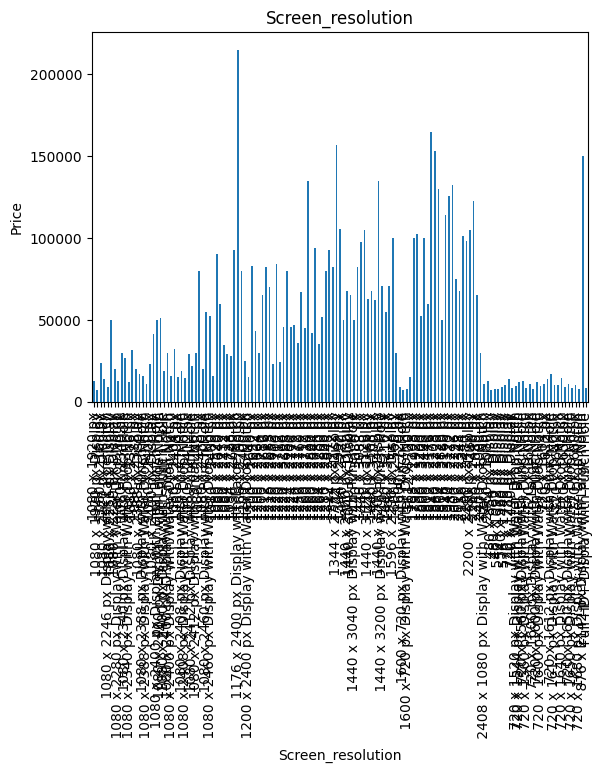

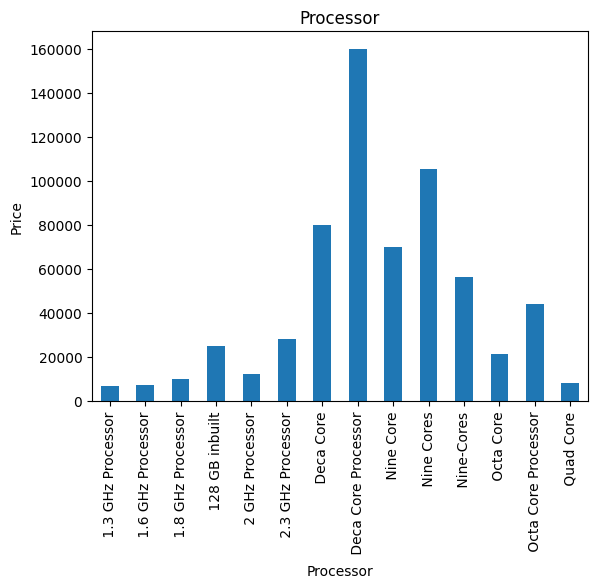

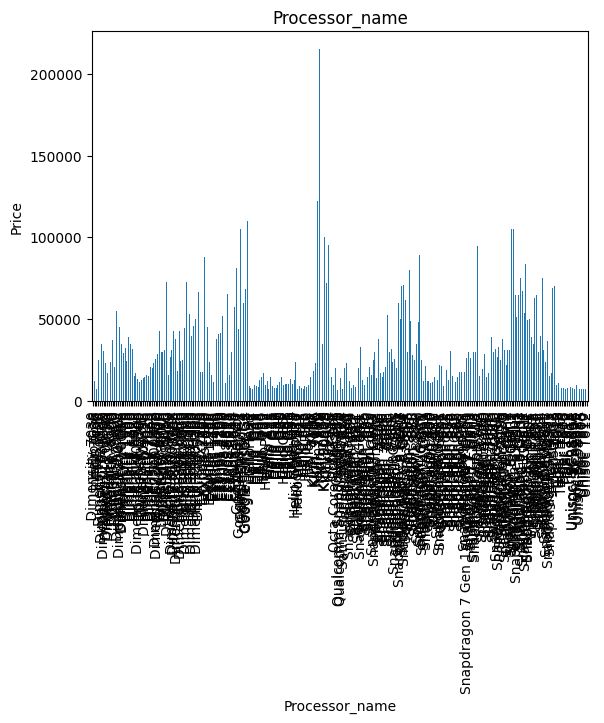

In [25]:
for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['Price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(feature)
    plt.show()

In [26]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing
features_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(dataset[feature].isnull().mean(),4)))

Android_version: 0.3234% missing values
Inbuilt_memory: 0.0139% missing values
fast_charging: 0.065% missing values
Screen_resolution: 0.0015% missing values
Processor: 0.0204% missing values


In [27]:
## Replace missing value with a new label
def replace_cat_feature(dataset,features_nan):
    data=dataset.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

dataset=replace_cat_feature(dataset,features_nan)

dataset[features_nan].isnull().sum()

Android_version      0
Inbuilt_memory       0
fast_charging        0
Screen_resolution    0
Processor            0
dtype: int64

In [28]:
dataset.head()

,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
0,4.65,68,"Dual Sim, 3G, 4G, 5G, VoLTE,",4 GB RAM,6000 mAh Battery,6.6 inches,50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",13,9999.0,Samsung,128 GB inbuilt,25W Fast Charging,2408 x 1080 px Display with Water Drop Notch,Octa Core Processor,Exynos 1330
1,4.20,63,"Dual Sim, 3G, 4G, VoLTE,",2 GB RAM,4000 mAh Battery,6.4 inches,13 MP + 5 MP + 2 MP Triple Rear &amp; 8 MP Fro...,"Memory Card Supported, upto 512 GB",10,9990.0,Samsung,32 GB inbuilt,15W Fast Charging,720 x 1560 px Display with Punch Hole,1.8 GHz Processor,Octa Core
2,4.30,75,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.6 inches,50 MP Quad Rear &amp; 8 MP Front Camera,"Memory Card Supported, upto 1 TB",12,11999.0,Samsung,64 GB inbuilt,25W Fast Charging,1080 x 2408 px Display with Water Drop Notch,2 GHz Processor,Octa Core
3,4.10,73,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,6000 mAh Battery,6.4 inches,48 MP Quad Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",12,11999.0,Samsung,64 GB inbuilt,Missing,720 x 1600 px,Octa Core,Helio G88
4,4.10,69,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.5 inches,13 MP + 2 MP + 2 MP Triple Rear &amp; 5 MP Fro...,"Memory Card Supported, upto 1 TB",11,11999.0,Samsung,64 GB inbuilt,15W Fast Charging,720 x 1600 px Display with Water Drop Notch,Octa Core,Helio P35


In [29]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(dataset[feature].isnull().mean(),4)))

In [31]:
dataset.isnull().sum()

Rating               0
Spec_score           0
No_of_sim            0
Ram                  0
Battery              0
Display              0
Camera               0
External_Memory      0
Android_version      0
Price                0
company              0
Inbuilt_memory       0
fast_charging        0
Screen_resolution    0
Processor            0
Processor_name       0
dtype: int64

In [32]:
import numpy as np
num_features=['Rating','Spec_score','Price']

for feature in num_features:
    dataset[feature]=np.log(dataset[feature])

In [33]:
dataset

,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
0,1.536867,4.219508,"Dual Sim, 3G, 4G, 5G, VoLTE,",4 GB RAM,6000 mAh Battery,6.6 inches,50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",13,9.210240,Samsung,128 GB inbuilt,25W Fast Charging,2408 x 1080 px Display with Water Drop Notch,Octa Core Processor,Exynos 1330
1,1.435085,4.143135,"Dual Sim, 3G, 4G, VoLTE,",2 GB RAM,4000 mAh Battery,6.4 inches,13 MP + 5 MP + 2 MP Triple Rear &amp; 8 MP Fro...,"Memory Card Supported, upto 512 GB",10,9.209340,Samsung,32 GB inbuilt,15W Fast Charging,720 x 1560 px Display with Punch Hole,1.8 GHz Processor,Octa Core
2,1.458615,4.317488,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.6 inches,50 MP Quad Rear &amp; 8 MP Front Camera,"Memory Card Supported, upto 1 TB",12,9.392579,Samsung,64 GB inbuilt,25W Fast Charging,1080 x 2408 px Display with Water Drop Notch,2 GHz Processor,Octa Core
3,1.410987,4.290459,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,6000 mAh Battery,6.4 inches,48 MP Quad Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",12,9.392579,Samsung,64 GB inbuilt,Missing,720 x 1600 px,Octa Core,Helio G88
4,1.410987,4.234107,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.5 inches,13 MP + 2 MP + 2 MP Triple Rear &amp; 5 MP Fro...,"Memory Card Supported, upto 1 TB",11,9.392579,Samsung,64 GB inbuilt,15W Fast Charging,720 x 1600 px Display with Water Drop Notch,Octa Core,Helio P35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,1.398717,4.317488,"Dual Sim, 3G, 4G, 5G, VoLTE,",4 GB RAM,5000 mAh Battery,6.6 inches,50 MP + 2 MP + 2 MP Triple Rear &amp; 8 MP Fro...,Memory Card (Hybrid),12,9.852142,TCL,64 GB inbuilt,15W Fast Charging,720 x 1612 px,Octa Core,Dimensity 700 5G
1366,1.410987,4.382027,"Dual Sim, 3G, 4G, VoLTE,",8 GB RAM,5000 mAh Battery,6.8 inches,50 MP + 2 MP Dual Rear &amp; 16 MP Front Camera,Memory Card (Hybrid),14,10.126231,TCL,128 GB inbuilt,33W Fast Charging,1200 x 2400 px,Octa Core,Dimensity 7050
1367,1.386294,4.382027,"Dual Sim, 3G, 4G, 5G, VoLTE,",6 GB RAM,5000 mAh Battery,6.6 inches,50 MP + 2 MP Dual Rear &amp; 16 MP Front Camera,"Memory Card Supported, upto 1 TB",13,10.085392,TCL,256 GB inbuilt,18W Fast Charging,720 x 1612 px,Octa Core,Dimensity 6080
1368,1.504077,4.369448,"Dual Sim, 3G, 4G, 5G, VoLTE,",6 GB RAM,5000 mAh Battery,6.6 inches,50 MP + 2 MP + 2 MP Triple Rear &amp; 8 MP Fro...,"Memory Card Supported, upto 1 TB",13,10.021226,TCL,256 GB inbuilt,15W Fast Charging,720 x 1612 px,Octa Core,Dimensity 6020


In [34]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O']

In [35]:
categorical_features

['No_of_sim',
 'Ram',
 'Battery',
 'Display',
 'Camera',
 'External_Memory',
 'Android_version',
 'company',
 'Inbuilt_memory',
 'fast_charging',
 'Screen_resolution',
 'Processor',
 'Processor_name']

In [36]:
for feature in categorical_features:
    temp=dataset.groupby(feature)['Price'].count()/len(dataset)
    temp_df=temp[temp>0.01].index
    dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],'Rare_var')



In [37]:
dataset.head(100)

,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
0,1.536867,4.219508,"Dual Sim, 3G, 4G, 5G, VoLTE,",4 GB RAM,6000 mAh Battery,6.6 inches,Rare_var,"Memory Card Supported, upto 1 TB",13,9.210240,Samsung,128 GB inbuilt,25W Fast Charging,Rare_var,Octa Core Processor,Rare_var
1,1.435085,4.143135,"Dual Sim, 3G, 4G, VoLTE,",2 GB RAM,4000 mAh Battery,6.4 inches,Rare_var,"Memory Card Supported, upto 512 GB",10,9.209340,Samsung,32 GB inbuilt,15W Fast Charging,Rare_var,Rare_var,Rare_var
2,1.458615,4.317488,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.6 inches,Rare_var,"Memory Card Supported, upto 1 TB",12,9.392579,Samsung,64 GB inbuilt,25W Fast Charging,1080 x 2408 px Display with Water Drop Notch,Rare_var,Rare_var
3,1.410987,4.290459,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,Rare_var,6.4 inches,Rare_var,"Memory Card Supported, upto 1 TB",12,9.392579,Samsung,64 GB inbuilt,Missing,720 x 1600 px,Octa Core,Helio G88
4,1.410987,4.234107,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.5 inches,Rare_var,"Memory Card Supported, upto 1 TB",11,9.392579,Samsung,64 GB inbuilt,15W Fast Charging,720 x 1600 px Display with Water Drop Notch,Octa Core,Helio P35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.458615,4.110874,"Dual Sim, 3G, 4G, VoLTE,",2 GB RAM,5000 mAh Battery,6.51 inches,8 MP Rear &amp; 5 MP Front Camera,"Memory Card Supported, upto 1 TB",11,9.046644,Vivo,32 GB inbuilt,Missing,720 x 1600 px Display with Water Drop Notch,Octa Core,Helio P35
96,1.410987,4.276666,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.56 inches,Rare_var,Memory Card Supported,14,9.210240,Vivo,128 GB inbuilt,15W Fast Charging,720 x 1612 px,Octa Core,Helio G85
97,1.446919,4.234107,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.51 inches,13 MP + 2 MP Dual Rear &amp; 5 MP Front Camera,Memory Card Supported,12,9.210240,Vivo,128 GB inbuilt,10W Fast Charging,720 x 1600 px Display with Water Drop Notch,Octa Core,Helio P35
98,1.504077,4.174387,"Dual Sim, 3G, 4G, VoLTE,",3 GB RAM,5000 mAh Battery,6.51 inches,13 MP + 2 MP Dual Rear &amp; 8 MP Front Camera,Memory Card Supported,11,9.210240,Vivo,32 GB inbuilt,Missing,720 x 1600 px Display with Water Drop Notch,Octa Core,Rare_var


In [38]:
for feature in categorical_features:
    labels_ordered=dataset.groupby([feature])['Price'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)

In [39]:
dataset.head(100)

,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
0,1.536867,4.219508,2,2,1,7,13,3,3,9.210240,10,2,9,16,3,13
1,1.435085,4.143135,0,0,3,10,13,1,0,9.209340,10,0,3,16,0,13
2,1.458615,4.317488,0,2,2,7,13,3,2,9.392579,10,1,9,5,0,13
3,1.410987,4.290459,0,2,4,10,13,3,2,9.392579,10,1,1,2,1,3
4,1.410987,4.234107,0,2,2,3,13,3,1,9.392579,10,1,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.458615,4.110874,0,0,0,1,0,3,1,9.046644,9,0,1,1,1,1
96,1.410987,4.276666,0,2,2,5,13,4,5,9.210240,9,2,3,4,1,0
97,1.446919,4.234107,0,2,2,1,2,4,2,9.210240,9,2,0,1,1,1
98,1.504077,4.174387,0,1,0,1,3,4,1,9.210240,9,0,1,1,1,13


In [40]:
scaling_feature=[feature for feature in dataset.columns if feature not in ['Price'] ]
len(scaling_feature)

15

In [42]:
feature_scale=[feature for feature in dataset.columns if feature not in ['Id','SalePrice']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[feature_scale])

MinMaxScaler()

In [43]:
scaler.transform(dataset[feature_scale])

array([[0.90998981, 0.56867615, 0.5       , ..., 0.84210526, 1.        ,
        0.61904762],
       [0.47941652, 0.47853904, 0.        , ..., 0.84210526, 0.        ,
        0.61904762],
       [0.57895804, 0.68431483, 0.        , ..., 0.26315789, 0.        ,
        0.61904762],
       ...,
       [0.27301855, 0.76048465, 0.5       , ..., 0.21052632, 0.33333333,
        0.42857143],
       [0.77127839, 0.74563889, 0.5       , ..., 0.21052632, 0.33333333,
        0.38095238],
       [0.90998981, 0.93819413, 0.75      , ..., 0.84210526, 0.33333333,
        0.95238095]])

In [44]:
# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([dataset[['Price']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(dataset[feature_scale]), columns=feature_scale)],
                    axis=1)

In [45]:
data.to_csv('processed_dataset.csv',index=False)

In [46]:
## for feature slection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [47]:
dataset=pd.read_csv('processed_dataset.csv')

In [48]:
X=dataset.drop(["Price.1","Price"],axis=1)
y=dataset["Price.1"]

In [49]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_sel_model.fit(X,y)


SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [50]:
feature_sel_model.get_support()

array([False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True])

In [51]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 15
selected features: 12
features with coefficients shrank to zero: 3


In [52]:
selected_feat

Index(['Spec_score', 'No_of_sim', 'Ram', 'Battery', 'Display', 'Camera',
       'External_Memory', 'company', 'Inbuilt_memory', 'fast_charging',
       'Screen_resolution', 'Processor_name'],
      dtype='object')

In [53]:
X=X[selected_feat]

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [55]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [57]:
regressor.score(X_test,y_test)

0.8205064973748992